# Loki2 Cell-level Multiple Instance Learning

This notebook demonstrates how to train the multiple instance learning (MIL) model on Loki2 cell embeddings for whole slide image classification, and visualize attention weights from trained MIL models.

## MIL Model

Prepare training data:
- Prepare your data as prampt files by code in `../src/mil/data/data_prepare/prampt_generate` for stage and metastasis task.
- Downsample cell embeddings by `../src/mil/data/data_prepare/prampt_downsample.py`.

Run MIL to generate attention weights:
- Run metastasis task by `../src/mil/models/TCGA-Loki_MILCell_blca_metastasis_5fold.py`.
- Run stage task by `../src/mil/models/TCGA-Loki_MILCell_blca_stage_5fold.py`.

## Plot Attention Heatmaps on WSI

Generate spatial heatmaps showing model attention across whole slide images. MIL models use attention mechanisms to identify which cells/regions are most important for classification decisions. This interpretability feature helps understand what morphological features drive predictions for tasks like cancer staging and metastasis prediction.

The example data is stored in the directory `../data/mil`, which can be donwloaded from [Google Drive](https://drive.google.com/drive/folders/19qzd8jTZBQ57a3N5xbiZFSGZJNpIz8NQ?usp=sharing).

You will need:
- Attention weight files from MIL models
- Whole slide images for visualization

In [1]:
import os
from pathlib import Path

import loki2.plot

In [2]:
# Parameters
max_dim = 4096  # Maximum side length for thumbnail
point_size = 3  # Scatter point size
alpha = 0.6  # Transparency
cmap = "rainbow"  # Colormap

### TCGA BLCA Stage Subtype MIL Results

Visualize attention weights from MIL models trained for cancer staging classification. This helps identify morphologically distinct regions that are predictive of tumor stage.

In [3]:
# Configure SVS file paths and attention file paths
slide_dict_stage = {
    "TCGA-2F-A9KW": "../data/mil/TCGA-2F-A9KW-01Z-00-DX1.CECFDA2E-2CE7-4115-B4E6-A3D75B130232.svs",
    "TCGA-4Z-AA80": "../data/mil/TCGA-4Z-AA80-01Z-00-DX1.303549D2-42A5-46C4-AD9D-D72337B416E5.svs",
}

attention_weights_stage = {
    "TCGA-2F-A9KW": "../data/mil/stage_attention.txt",
    "TCGA-4Z-AA80": "../data/mil/stage_attention.txt",
}

[PLOT] TCGA-2F-A9KW
[SAVED] ../outputs/mil/output/stage/attention_heatmap_TCGA-2F-A9KW.png


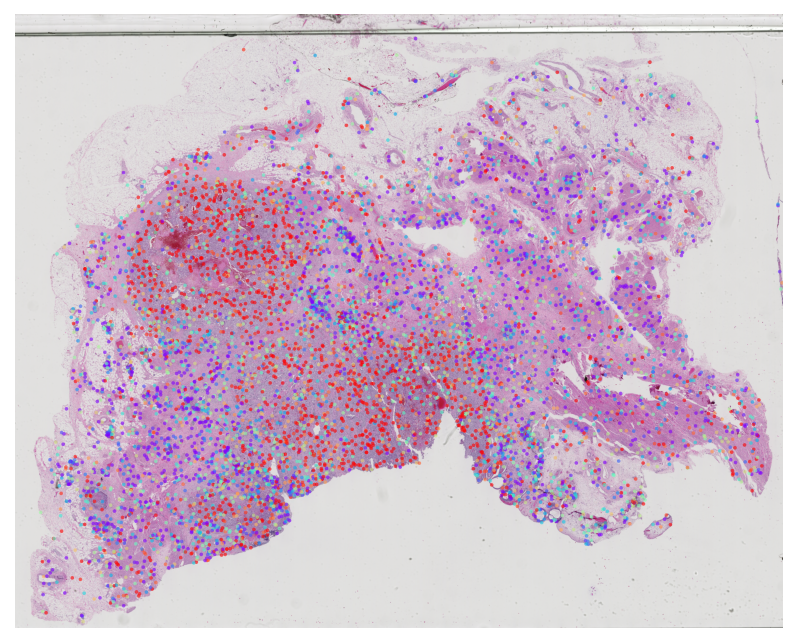

[PLOT] TCGA-4Z-AA80
[SAVED] ../outputs/mil/output/stage/attention_heatmap_TCGA-4Z-AA80.png


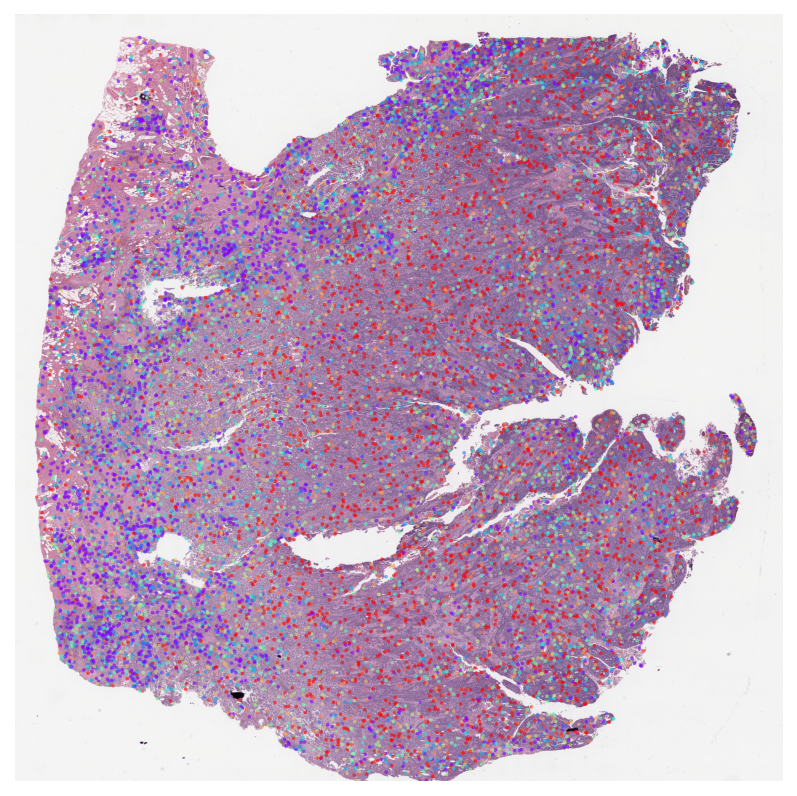


✅ All attention heatmaps processed!


In [4]:
out_dir = Path("../outputs/mil/output/stage/")
os.makedirs(out_dir, exist_ok=True)

save_images = True  # If True → save PNG; if False → only display

for case_id, svs_path in slide_dict_stage.items():
    att_txt = attention_weights_stage.get(case_id)
    if att_txt is None:
        print(f"[SKIP] No attention file for {case_id}")
        continue

    out_png = out_dir / f"attention_heatmap_{case_id}.png" if save_images else None
    print(f"[PLOT] {case_id}")
    
    loki2.plot.plot_attention_on_slide(
        svs_path=svs_path,
        att_txt=att_txt,
        case_prefix=case_id,
        save_path=out_png,
        max_dim=max_dim,
        point_size=point_size,
        alpha=alpha,
        cmap=cmap,
    )

print("\n✅ All attention heatmaps processed!")

### TCGA BLCA Metastasis Subtype MIL Results

Visualize attention weights from MIL models trained for metastasis prediction. This highlights cells and regions that are most predictive of metastasis.

In [5]:
# Configure SVS file paths and attention file paths
slide_dict_stage_meta = {
    "TCGA-DK-A3X2": "../data/mil/TCGA-DK-A3X2-01Z-00-DX1.CB507611-E3AE-43A2-B5F8-EEAE59423E2E.svs",
    "TCGA-FD-A6TF": "../data/mil/TCGA-FD-A6TF-01Z-00-DX1.15B2C3E0-A0D7-4879-82B1-6C9AB09AF8E2.svs",
}

attention_weights_meta = {
    "TCGA-DK-A3X2": "../data/mil/metastasis_attention.txt",
    "TCGA-FD-A6TF": "../data/mil/metastasis_attention.txt",
}

[PLOT] TCGA-DK-A3X2
[SAVED] ../outputs/mil/output/metastasis/attention_heatmap_TCGA-DK-A3X2.png


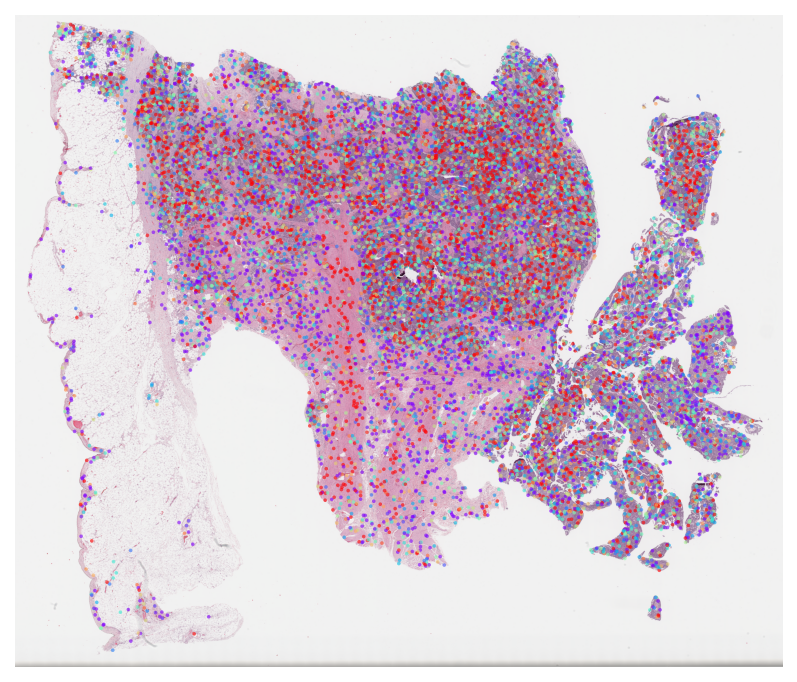

[PLOT] TCGA-FD-A6TF
[SAVED] ../outputs/mil/output/metastasis/attention_heatmap_TCGA-FD-A6TF.png


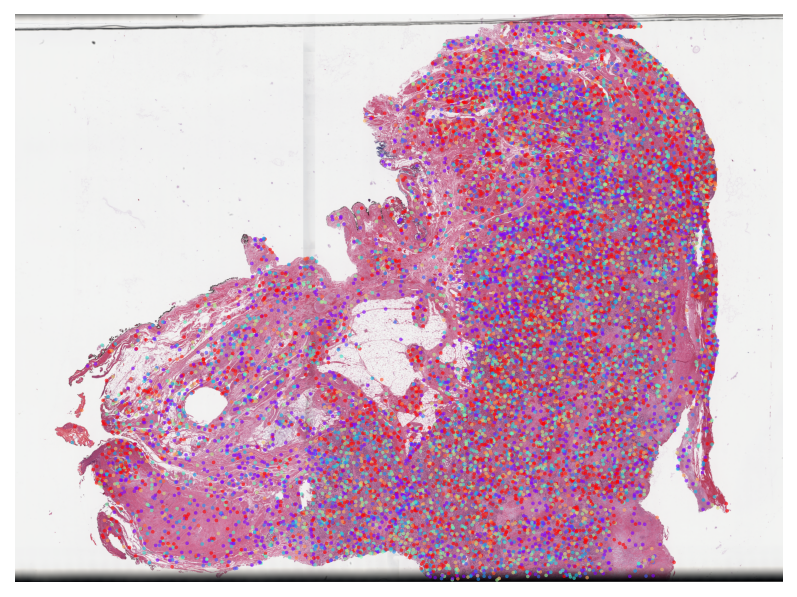


✅ All attention heatmaps processed!


In [6]:
out_dir = Path("../outputs/mil/output/metastasis/")
os.makedirs(out_dir, exist_ok=True)

save_images = True  # If True → save PNG; if False → only display

for case_id, svs_path in slide_dict_stage_meta.items():
    att_txt = attention_weights_meta.get(case_id)
    if att_txt is None:
        print(f"[SKIP] No attention file for {case_id}")
        continue

    out_png = out_dir / f"attention_heatmap_{case_id}.png" if save_images else None
    print(f"[PLOT] {case_id}")
    
    loki2.plot.plot_attention_on_slide(
        svs_path=svs_path,
        att_txt=att_txt,
        case_prefix=case_id,
        save_path=out_png,
        max_dim=max_dim,
        point_size=point_size,
        alpha=alpha,
        cmap=cmap,
    )

print("\n✅ All attention heatmaps processed!")